In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter
import pickle

# Filter of fast OFF cells shown in publication

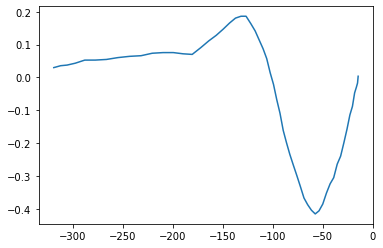

In [2]:
fp = '/user/sebert/home/Documents/Simulations/motion/chen_2013/chen_2013_fast_OFF_filter.csv'
chen_data = pd.read_csv(fp)
cols = chen_data.columns
#chen_data.info()

time = np.arange(-400,0,1)
x = gaussian_filter(chen_data[cols[0]].dropna().values[1:].astype(float),sigma =5)
y = chen_data[cols[1]].dropna().values[1:].astype(float)
plt.plot(x,y)
plt.show()

In [3]:
# todo make a fit 

# data of responses to different speeds, params not given 

In [4]:
fp = '/user/sebert/home/Documents/Simulations/motion/chen_2013/chen_2013_figure9_smooth_data.csv'
chen_data = pd.read_csv(fp)
cols = chen_data.columns

In [5]:
data = []
nb_dsets = int(len(cols))

dt = 1
time = np.arange(-1000,500,dt)

for dset in range(0,nb_dsets,2):
    # extract x and y coodrinates
    x = gaussian_filter(chen_data[cols[dset]].dropna().values[1:].astype(float),sigma =1)
    y = chen_data[cols[dset+1]].dropna().values[1:].astype(float)

    # interpolate
    f = interp1d(x,y, fill_value='extrapolate')

    # resample
    xdt = f(time)
    data.append(xdt)

data = np.asarray(data)



In [6]:
# make new df 
columns = ['smooth_ACM_0.27', 'smooth_data_0.27',
       'smooth_ACM_0.81', 'smooth_data_0.81',
       'smooth_ACM_1.62', 'smooth_data_1.62',
       'smooth_ACM_3.24','smooth_data_3.24']


chen_data_clean = pd.DataFrame(data.T,columns=columns) 



chen_data_clean['time'] = time

<AxesSubplot:xlabel='time'>

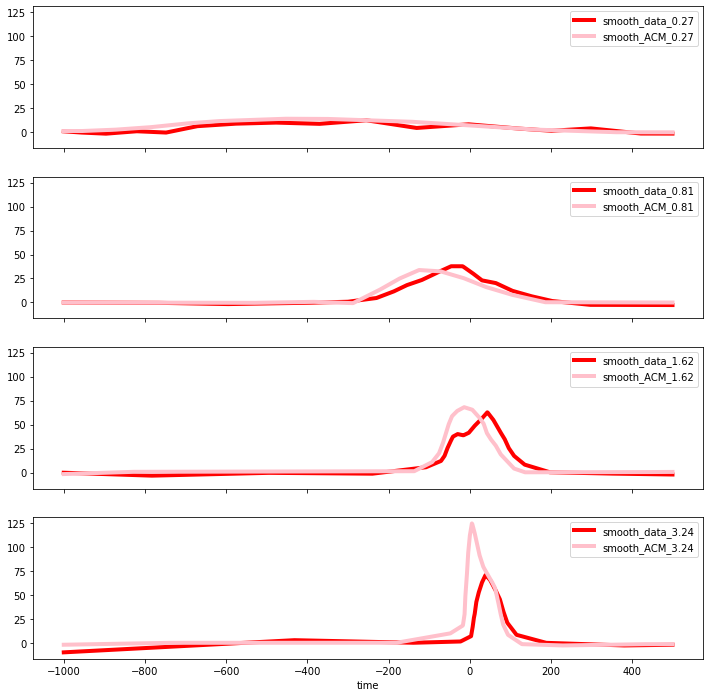

In [7]:
# plot data
fig, ax = plt.subplots(4,1, sharex = True, sharey = True, figsize = (12,12))
chen_data_clean.plot(x = 'time',y = 'smooth_data_0.27', ax = ax[0], color = 'red', linewidth = 4)
chen_data_clean.plot(x = 'time',y = 'smooth_ACM_0.27', ax = ax[0], color = 'pink', linewidth = 4)

chen_data_clean.plot(x = 'time',y = 'smooth_data_0.81', ax = ax[1], color = 'red', linewidth = 4)
chen_data_clean.plot(x = 'time',y = 'smooth_ACM_0.81', ax = ax[1], color = 'pink', linewidth = 4)

chen_data_clean.plot(x = 'time',y = 'smooth_data_1.62', ax = ax[2], color = 'red', linewidth = 4)
chen_data_clean.plot(x = 'time',y = 'smooth_ACM_1.62', ax = ax[2], color = 'pink', linewidth = 4)

chen_data_clean.plot(x = 'time',y = 'smooth_data_3.24', ax = ax[3], color = 'red', linewidth = 4)
chen_data_clean.plot(x = 'time',y = 'smooth_ACM_3.24', ax = ax[3], color = 'pink', linewidth = 4)


#ax[0].set_ylim(0,200)


# load simulation made with ACM model (not fitted)

In [30]:
# load simulations 

speeds = [0.27,0.81,1.62,3.24]

data = []
cell = 300
for s in speeds: 
    fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/ACM/ACM_slow/w_GC/w_GC_0.0/smooth_{s}'
    with open(f'{fp}/out', 'rb') as handle:
        out = pickle.load(handle)    
        
    with open(f'{fp}/params', 'rb') as handle:
        params = pickle.load(handle)

    duration = params['duration']
    dt = params['dt']
    #time = (np.arange(0,duration,dt)- params['tps_rf_GC_mid'][50])*1000
    time = (np.arange(0,duration,dt) - (params['spacing']*cell)/params['speed'])*1000#+45
    data.append([time,out['RG'][cell]])




In [31]:
data2 = []
cell = 300

speeds = [0.81]
speeds = [0.27,0.81,1.62,3.24]


for s in speeds: 
    print(s)
    fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/ACM/ACM_slow/bar_width/bar_width_0.08/smooth_{s}'
    with open(f'{fp}/out', 'rb') as handle:
        out = pickle.load(handle)    
        
    with open(f'{fp}/params', 'rb') as handle:
        params = pickle.load(handle)

    duration = params['duration']
    dt = params['dt']
    #time = (np.arange(0,duration,dt)- params['tps_rf_GC_mid'][50])*1000
    time = (np.arange(0,duration,dt) - (params['spacing']*cell)/params['speed'])*1000#+45
    data2.append([time,out['RG'][cell]])



0.27
0.81
1.62
3.24


(-2000.0, 500.0)

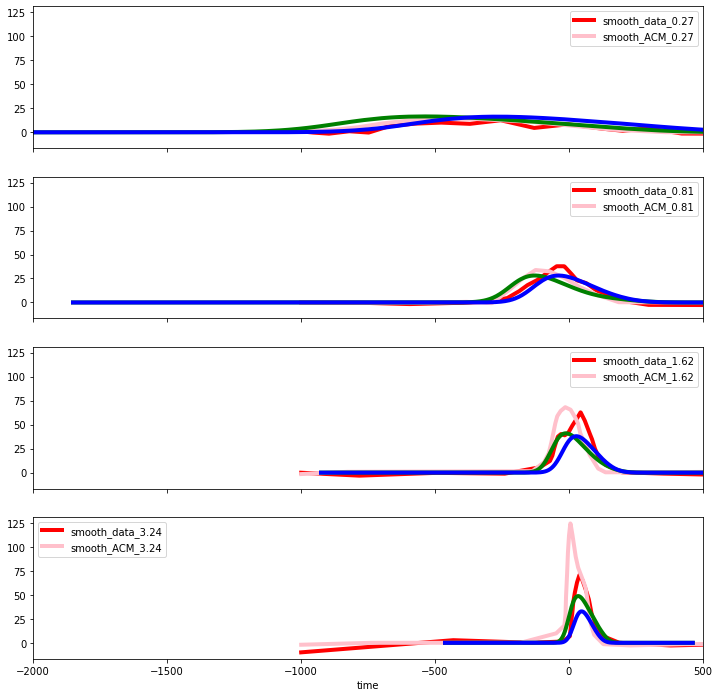

In [32]:
fig, ax = plt.subplots(4,1, sharex = True, sharey = True, figsize = (12,12))


chen_data_clean.plot(x = 'time',y = 'smooth_data_0.27', ax = ax[0], color = 'red', linewidth = 4)
chen_data_clean.plot(x = 'time',y = 'smooth_ACM_0.27', ax = ax[0], color = 'pink', linewidth = 4)

chen_data_clean.plot(x = 'time',y = 'smooth_data_0.81', ax = ax[1], color = 'red', linewidth = 4)
chen_data_clean.plot(x = 'time',y = 'smooth_ACM_0.81', ax = ax[1], color = 'pink', linewidth = 4)

chen_data_clean.plot(x = 'time',y = 'smooth_data_1.62', ax = ax[2], color = 'red', linewidth = 4)
chen_data_clean.plot(x = 'time',y = 'smooth_ACM_1.62', ax = ax[2], color = 'pink', linewidth = 4)

chen_data_clean.plot(x = 'time',y = 'smooth_data_3.24', ax = ax[3], color = 'red', linewidth = 4)
chen_data_clean.plot(x = 'time',y = 'smooth_ACM_3.24', ax = ax[3], color = 'pink', linewidth = 4)


ax[0].plot(data[0][0],data[0][1], color = 'green', linewidth = 4, label = 'ACM reproduction')
ax[1].plot(data[1][0],data[1][1], color = 'green', linewidth = 4, label = 'ACM reproduction')
ax[2].plot(data[2][0],data[2][1], color = 'green', linewidth = 4, label = 'ACM reproduction')
ax[3].plot(data[3][0],data[3][1], color = 'green', linewidth = 4, label = 'ACM reproduction')

ax[0].plot(data2[0][0],data2[0][1], color = 'blue', linewidth = 4, label = 'thin bar')
ax[1].plot(data2[1][0],data2[1][1], color = 'blue', linewidth = 4, label = 'thin bar')
ax[2].plot(data2[2][0],data2[2][1], color = 'blue', linewidth = 4, label = 'thin bar')
ax[3].plot(data2[3][0],data2[3][1], color = 'blue', linewidth = 4, label = 'thin bar')


ax[0].set_xlim(-2000,500)

In [33]:
nb_cols = len(columns)

# extract max simulations
peak_tp_ACM = []
for i in range(0,nb_cols,2):

    peak_tp_ACM.append(-1*chen_data_clean['time'][chen_data_clean[columns[i]].argmax()])
    
    
peak_tp_ACM_ours = []
for i in range(0,4,1):

    peak_tp_ACM_ours.append(-1*data[i][0][data[i][1].argmax()])
    
    
peak_tp_ACM_DS = []
for i in range(0,4,1):

    peak_tp_ACM_DS.append(-1*data2[i][0][data2[i][1].argmax()])

# extract max data
peak_tp_data = []
for i in range(1,nb_cols,2):

    peak_tp_data.append(-1*chen_data_clean['time'][chen_data_clean[columns[i]].argmax()])
# plot experimental and simulated anticipation in time and space


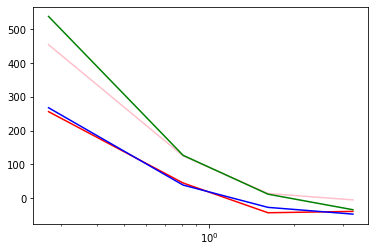

In [34]:
plt.plot(speeds, peak_tp_ACM, color = 'pink')
plt.plot(speeds, peak_tp_data, color = 'red')
plt.plot(speeds, peak_tp_ACM_ours, color = 'green')
plt.plot(speeds, peak_tp_ACM_DS, color = 'blue')
plt.xscale('log')

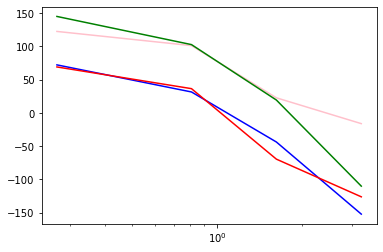

In [35]:
plt.plot(speeds, np.array(peak_tp_ACM)*speeds, color = 'pink')
plt.plot(speeds, np.array(peak_tp_ACM_ours)*speeds, color = 'green')
plt.plot(speeds, np.array(peak_tp_ACM_DS)*speeds, color = 'blue')
plt.plot(speeds, np.array(peak_tp_data)*speeds, color = 'red')
plt.xscale('log')